In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor

In [24]:
df = pd.read_csv('GES_RES_SON_SON.csv')
df.head()

,Saat,Yuk Tahmin Plani (MWh),Ikili Anlasma (MWh),PTF (TL/MWh)Okuma Yukumlulu,SAM (MWh),SSM(MWh),KGUP (MWh),SMF (TL/MWh),YAL (0) Kodlu (MWh),YAL (1) Kodlu (MWh),...,CINGILLI_Windy Estimated Cloudiness Rate (%),CINGILLI_Windy Final (%),CINGILLI_Final Production (MWh),CINGILLI_KGUP (MWh),CINGILLI_Actual KGUP (MWh),BUYUKALAN_Windy Estimated Cloudiness Rate (%),BUYUKALAN_Windy Final (%),BUYUKALAN_Final Production (MWh),BUYUKALAN_KGUP (MWh),BUYUKALAN_Actual KGUP (MWh)
0,27.04.2021 00:00,34226.0,31400.5,325.94,21980.5,21980.5,31669.89,355.94,651.00,0.0,...,NaN,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.04.2021 01:00,32910.0,27333.1,331.03,23674.1,23674.1,30531.04,361.03,622.83,0.0,...,NaN,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.04.2021 02:00,32334.0,26758.6,331.13,23621.9,23621.9,29899.17,361.13,565.00,0.0,...,NaN,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.04.2021 03:00,32269.0,26769.5,331.20,23437.8,23437.8,29652.16,358.00,565.00,0.0,...,NaN,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.04.2021 04:00,31823.0,26725.7,328.71,22844.1,22844.1,29087.80,358.71,451.00,0.0,...,NaN,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df['spread'] = df['SMF (TL/MWh)'] - df['PTF (TL/MWh)Okuma Yukumlulu']
df['net_load'] = df['YAL (0) Kodlu (MWh)'] + df['YAL (1) Kodlu (MWh)'] + df['YAL (2) Kodlu (MWh)'] - df['YAL Teslim Edilmeyen (MWh)'] - df['YAT (0) Kodlu (MWh)'] - df['YAT (1) Kodlu (MWh)'] - df['YAT (2) Kodlu (MWh)'] + df['YAT Teslim Edilmeyen (MWh)']

In [28]:
df.columns

Index(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
       'SMF (TL/MWh)', 'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)',
       'Balikesir_Windy Estimated Wind Rate (m/s)',
       'Balikesir_Windy Final (m/s)', 'Balikesir_Final Production (MWh)',
       'Balikesir_KGUP (MWh)', 'Balikesir_Actual KGUP (MWh)',
       'Gokcedag_Windy Estimated Wind Rate (m/s)',
       'Gokcedag_Windy Final (m/s)', 'Gokcedag_Final Production (MWh)',
       'Gokcedag_KGUP (MWh)', 'Gokcedag_Actual KGUP (MWh)',
       'Dinar_Windy Estimated Wind Rate (m/s)', 'Dinar_Windy Final (m/s)',
       'Dinar_Final Production (MWh)', 'Dinar_KGUP (MWh)',
       'Dinar_Actual KGUP (MWh)', 'Ucpinar_Windy Estimated Wind Rate (m/s)',
       'Ucpinar_Windy Final (m/s)',

In [29]:
#feature engineering:

df = df.drop(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
              
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
     'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)','KARAPINAR_Windy Final (%)', 'KARAPINAR_Final Production (MWh)',
       'KARAPINAR_KGUP (MWh)', 'KARAPINAR_Actual KGUP (MWh)','KIVANC_Windy Final (%)',
       'KIVANC_Final Production (MWh)', 'KIVANC_KGUP (MWh)',
       'KIVANC_Actual KGUP (MWh)','TEKSIN_Windy Final (%)',
       'TEKSIN_Final Production (MWh)', 'TEKSIN_KGUP (MWh)',
       'TEKSIN_Actual KGUP (MWh)','CINGILLI_Windy Final (%)', 'CINGILLI_Final Production (MWh)',
       'CINGILLI_KGUP (MWh)', 'CINGILLI_Actual KGUP (MWh)','BUYUKALAN_Windy Final (%)', 'BUYUKALAN_Final Production (MWh)',
       'BUYUKALAN_KGUP (MWh)', 'BUYUKALAN_Actual KGUP (MWh)','Balikesir_Windy Final (m/s)', 'Balikesir_Final Production (MWh)',
       'Balikesir_KGUP (MWh)', 'Balikesir_Actual KGUP (MWh)','Gokcedag_Windy Final (m/s)', 'Gokcedag_Final Production (MWh)',
       'Gokcedag_KGUP (MWh)', 'Gokcedag_Actual KGUP (MWh)','Dinar_Windy Final (m/s)',
       'Dinar_Final Production (MWh)', 'Dinar_KGUP (MWh)',
       'Dinar_Actual KGUP (MWh)','Ucpinar_Windy Final (m/s)', 'Ucpinar_Final Production (MWh)',
       'Ucpinar_KGUP (MWh)', 'Ucpinar_Actual KGUP (MWh)','Geycek_Windy Final (m/s)',
       'Geycek_Final Production (MWh)', 'Geycek_KGUP (MWh)',
       'Geycek_Actual KGUP (MWh)', 'spread'], axis=1)

In [30]:
df.head()

,SMF (TL/MWh),Balikesir_Windy Estimated Wind Rate (m/s),Gokcedag_Windy Estimated Wind Rate (m/s),Dinar_Windy Estimated Wind Rate (m/s),Ucpinar_Windy Estimated Wind Rate (m/s),Geycek_Windy Estimated Wind Rate (m/s),KARAPINAR_Windy Estimated Cloudiness Rate (%),KIVANC_Windy Estimated Cloudiness Rate (%),TEKSIN_Windy Estimated Cloudiness Rate (%),CINGILLI_Windy Estimated Cloudiness Rate (%),BUYUKALAN_Windy Estimated Cloudiness Rate (%),net_load
0,355.94,2.0,1.0,2.0,2.0,5.0,10.0,0.0,44.0,NaN,0.0,410.32
1,361.03,2.0,1.0,2.0,3.0,3.0,10.0,0.0,84.0,NaN,0.0,434.45
2,361.13,1.0,1.0,2.0,3.0,3.0,16.0,0.0,84.0,NaN,0.0,455.39
3,358.00,1.0,1.0,2.0,3.0,3.0,16.0,0.0,84.0,NaN,0.0,328.25
4,358.71,1.0,1.0,1.0,3.0,3.0,4.0,0.0,89.0,NaN,0.0,370.82


In [31]:
df['Date'] = pd.date_range(start = '20210427', freq = 'H' , periods = len(df))
df.dropna(inplace = True)
df.head()

,SMF (TL/MWh),Balikesir_Windy Estimated Wind Rate (m/s),Gokcedag_Windy Estimated Wind Rate (m/s),Dinar_Windy Estimated Wind Rate (m/s),Ucpinar_Windy Estimated Wind Rate (m/s),Geycek_Windy Estimated Wind Rate (m/s),KARAPINAR_Windy Estimated Cloudiness Rate (%),KIVANC_Windy Estimated Cloudiness Rate (%),TEKSIN_Windy Estimated Cloudiness Rate (%),CINGILLI_Windy Estimated Cloudiness Rate (%),BUYUKALAN_Windy Estimated Cloudiness Rate (%),net_load,Date
24,321.23,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,22.0,-196.21,2021-04-28 00:00:00
25,332.87,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,22.0,-1.46,2021-04-28 01:00:00
26,331.43,1.0,1.0,1.0,0.0,2.0,18.0,0.0,0.0,0.0,22.0,0.00,2021-04-28 02:00:00
27,320.73,1.0,1.0,1.0,1.0,2.0,18.0,1.0,17.0,1.0,22.0,-102.18,2021-04-28 03:00:00
28,317.77,1.0,0.0,1.0,1.0,2.0,18.0,1.0,17.0,1.0,22.0,-79.27,2021-04-28 04:00:00


In [32]:
df['10_prev'] = df['SMF (TL/MWh)'].shift(10)
df['11_prev'] = df['SMF (TL/MWh)'].shift(11)
df['12_prev'] = df['SMF (TL/MWh)'].shift(12)
# df['1prev'] = df['net_load'].shift(1)
# df['2prev'] = df['net_load'].shift(2)


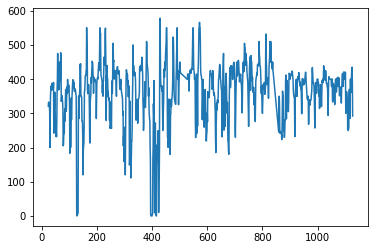

In [33]:
plt.plot(df.index , df['SMF (TL/MWh)'])

In [34]:
rowsData = []
for i, row in df.iterrows():

  data = dict(
      target = row['SMF (TL/MWh)'],
      weekDay = row.Date.dayofweek,
      weekOfYear = row.Date.week,
      hourOfDay = row.Date.hour,
      dayOfMonth = row.Date.day,
      KARAPINAR_Windy = row['KARAPINAR_Windy Estimated Cloudiness Rate (%)'],
      KIVANC_Windy = row['KIVANC_Windy Estimated Cloudiness Rate (%)'],
      TEKSIN_Windy = row['TEKSIN_Windy Estimated Cloudiness Rate (%)'],
      CINGILLI_Windy = row['CINGILLI_Windy Estimated Cloudiness Rate (%)'],
      BUYUKALAN_Windy = row['BUYUKALAN_Windy Estimated Cloudiness Rate (%)'],
      Balikesir_Windy = row['Balikesir_Windy Estimated Wind Rate (m/s)'],
      Gokcedag_Windy = row['Gokcedag_Windy Estimated Wind Rate (m/s)'],
      Dinar_Windy = row['Dinar_Windy Estimated Wind Rate (m/s)'],
      Ucpinar_Windy = row['Ucpinar_Windy Estimated Wind Rate (m/s)'],
      Geycek_Windy = row['Geycek_Windy Estimated Wind Rate (m/s)'],
      ten_prev = row['10_prev'],
      elevenPrev = row['11_prev'],
      twelvePrev = row['12_prev']
      
      
      
      
)
  
  rowsData.append(data)
df_data = pd.DataFrame(rowsData)

In [35]:
df_data.dropna(inplace = True)
df_data.head()

,target,weekDay,weekOfYear,hourOfDay,dayOfMonth,KARAPINAR_Windy,KIVANC_Windy,TEKSIN_Windy,CINGILLI_Windy,BUYUKALAN_Windy,Balikesir_Windy,Gokcedag_Windy,Dinar_Windy,Ucpinar_Windy,Geycek_Windy,ten_prev,elevenPrev,twelvePrev
12,367.07,2,17,12,28,2.0,0.0,0.0,4.0,47.0,2.0,1.0,3.0,1.0,3.0,331.43,332.87,321.23
13,378.03,2,17,13,28,2.0,0.0,0.0,4.0,47.0,2.0,1.0,3.0,1.0,3.0,320.73,331.43,332.87
14,388.00,2,17,14,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,317.77,320.73,331.43
15,383.27,2,17,15,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,307.00,317.77,320.73
16,377.43,2,17,16,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,200.01,307.00,317.77


In [36]:
def get_models(models=dict()):
    # non-linear models
    models['knn'] = KNeighborsRegressor(n_neighbors=7)
    models['DecisionTreeRegressor'] = DecisionTreeRegressor()
    models['extraTreeRegressor'] = ExtraTreeRegressor()
    models['SVR'] = SVR()
    models['lr'] = LinearRegression()
    models['ridge'] = Ridge()
    models['passiveAgressiveRegressor'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
    # # ensemble models
    n_trees = 100
    models['adaBoost'] = AdaBoostRegressor(n_estimators=n_trees)
    models['baggingRegressor'] = BaggingRegressor(n_estimators=n_trees)
    models['RandomForest'] = RandomForestRegressor(n_estimators=n_trees)
    models['extraTreesRegressor'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['GradientBoosting'] = GradientBoostingRegressor(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models


In [37]:
models = get_models()

Defined 12 models


In [38]:
df_data['target'] = df_data['target'].shift(-1)
df_data.dropna(inplace = True)
df_data.head()

,target,weekDay,weekOfYear,hourOfDay,dayOfMonth,KARAPINAR_Windy,KIVANC_Windy,TEKSIN_Windy,CINGILLI_Windy,BUYUKALAN_Windy,Balikesir_Windy,Gokcedag_Windy,Dinar_Windy,Ucpinar_Windy,Geycek_Windy,ten_prev,elevenPrev,twelvePrev
12,378.03,2,17,12,28,2.0,0.0,0.0,4.0,47.0,2.0,1.0,3.0,1.0,3.0,331.43,332.87,321.23
13,388.00,2,17,13,28,2.0,0.0,0.0,4.0,47.0,2.0,1.0,3.0,1.0,3.0,320.73,331.43,332.87
14,383.27,2,17,14,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,317.77,320.73,331.43
15,377.43,2,17,15,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,307.00,317.77,320.73
16,379.71,2,17,16,28,27.0,8.0,2.0,0.0,11.0,4.0,2.0,5.0,0.0,5.0,200.01,307.00,317.77


In [39]:
df_data.corrwith(df_data['target'])


target             1.000000
weekDay           -0.102104
weekOfYear         0.148301
hourOfDay          0.271665
dayOfMonth         0.124332
KARAPINAR_Windy    0.040634
KIVANC_Windy       0.049656
TEKSIN_Windy       0.123995
CINGILLI_Windy     0.061358
BUYUKALAN_Windy    0.069700
Balikesir_Windy   -0.001293
Gokcedag_Windy     0.198517
Dinar_Windy        0.053559
Ucpinar_Windy      0.012736
Geycek_Windy      -0.014534
ten_prev           0.019657
elevenPrev        -0.005359
twelvePrev        -0.009738
dtype: float64

In [40]:
train_size = int(len(df_data) * 0.9)
train, test = df_data.iloc[0:train_size], df_data.iloc[train_size:len(df_data)]
print(len(train), len(test))




f_columns = ['weekDay' , 'weekOfYear' , 'hourOfDay' , 'dayOfMonth' , 'KARAPINAR_Windy' ,'KIVANC_Windy','TEKSIN_Windy','CINGILLI_Windy','BUYUKALAN_Windy','Balikesir_Windy',
            'Gokcedag_Windy','Dinar_Windy','Ucpinar_Windy','Geycek_Windy' , 'elevenPrev' , 'ten_prev','twelvePrev']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

f_transformer = scaler_X.fit(train[f_columns].to_numpy())
target_transformer =scaler_y.fit(train[['target']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['target'] = target_transformer.transform(train[['target']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['target'] = target_transformer.transform(test[['target']])

943 105


In [48]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def evaluate_models(models, Xtrain, yTrain, Xtest , yTest):
    mae = dict()
    for name, model in models.items():
        regressor = model
        regressor.fit(Xtrain, yTrain)
        y_pred = regressor.predict(test.iloc[:,1:])
        y_pred = target_transformer.inverse_transform(y_pred)
        y_real = target_transformer.inverse_transform(yTest)

        plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), y_real, marker='.', label="true")
        plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), y_pred, 'r', label="prediction")
        plt.title(f'Model name: {name}')
        plt.legend()
        plt.show()
        maeModel = mean_absolute_error(y_real,y_pred)
        mae[f'{name}'] = (maeModel)
    return mae

In [46]:
X = train.iloc[:,1:]
y = train.iloc[:,0]
Xtest = test.iloc[:,1:]
yTest = test.iloc[:,0]


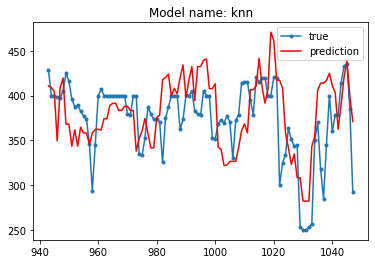

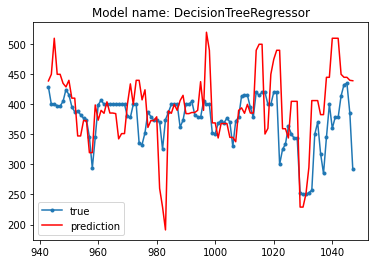

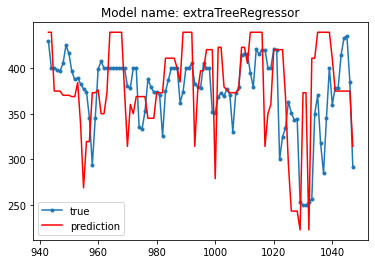

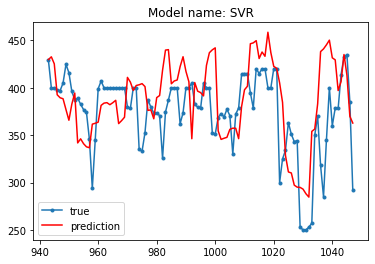

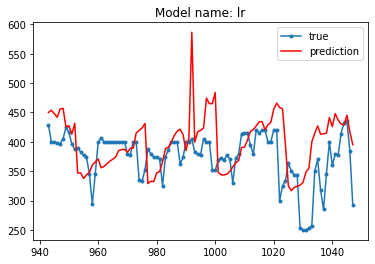

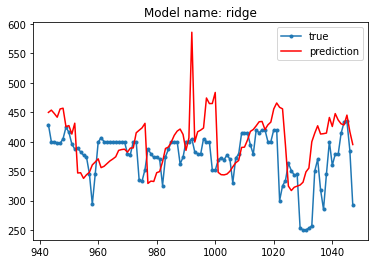

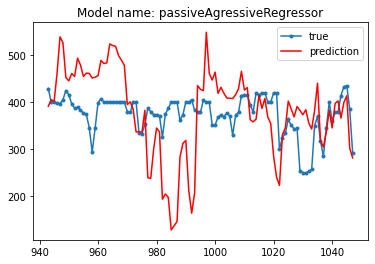

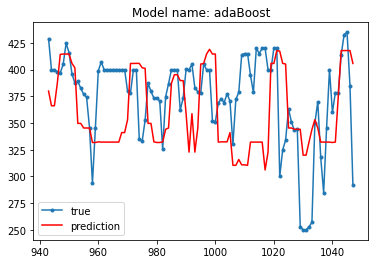

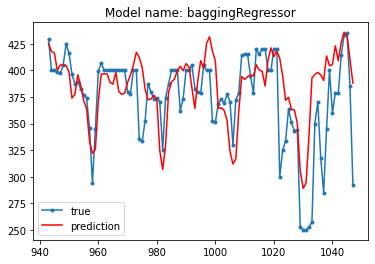

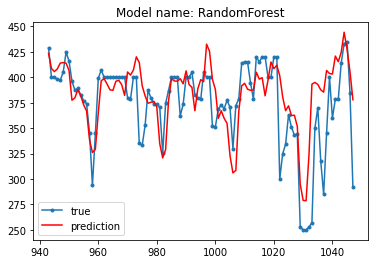

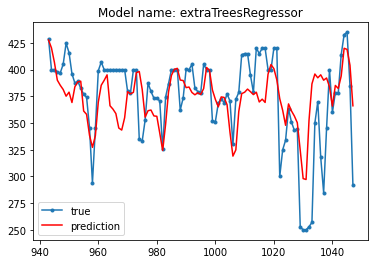

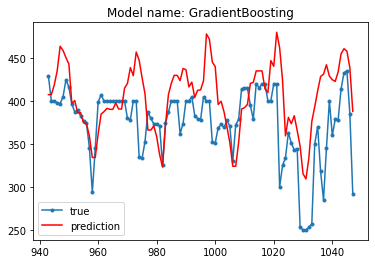

{'knn': 32.74591836734694,
 'DecisionTreeRegressor': 43.74857142857143,
 'extraTreeRegressor': 42.041333333333334,
 'SVR': 34.36459308835969,
 'lr': 42.95212501751646,
 'ridge': 42.9060011330298,
 'passiveAgressiveRegressor': 73.34490253861621,
 'adaBoost': 42.094924809958236,
 'baggingRegressor': 25.41368285714286,
 'RandomForest': 23.303353333333334,
 'extraTreesRegressor': 24.792826666666667,
 'GradientBoosting': 37.544306046329545}

In [49]:
evaluate_models(models,X, y, Xtest , yTest)